# **Insurance Cost Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Inspection

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Cleaning

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Multicollinearity

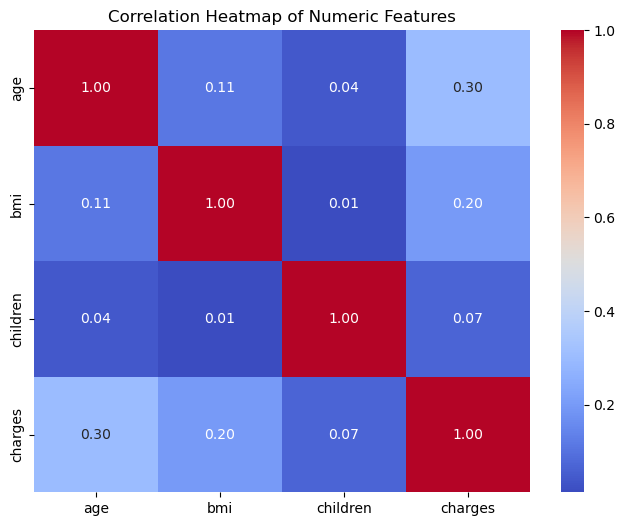

In [29]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Data Preprocessing

In [31]:
X = df.drop('charges', axis=1) # feature
y = df['charges'] # target

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. One-hot encoding
2. Label encoding
3. Ordinal encoding

In [35]:
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)
display(X_encoded.head())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [36]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   sex_male          1337 non-null   bool   
 4   smoker_yes        1337 non-null   bool   
 5   region_northwest  1337 non-null   bool   
 6   region_southeast  1337 non-null   bool   
 7   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 48.3 KB


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,-1.157680,-0.996928,-0.907908,0.971409,-0.500292,-0.572669,-0.605812,-0.574110
1,-1.300619,-0.792762,0.766904,0.971409,-0.500292,-0.572669,-0.605812,-0.574110
2,0.914926,1.154664,0.766904,-1.029432,-0.500292,1.746208,-0.605812,-0.574110
3,1.701087,1.806837,-0.907908,0.971409,-0.500292,-0.572669,1.650678,-0.574110
4,0.557580,-0.651417,0.766904,-1.029432,-0.500292,-0.572669,-0.605812,-0.574110
...,...,...,...,...,...,...,...,...
1064,0.843457,0.730628,0.766904,-1.029432,1.998831,-0.572669,-0.605812,-0.574110
1065,-0.871804,2.539188,0.766904,0.971409,-0.500292,-0.572669,-0.605812,1.741827
1066,-1.372088,-1.411872,-0.070502,0.971409,-0.500292,-0.572669,-0.605812,1.741827
1067,-0.085643,-0.419974,1.604310,-1.029432,-0.500292,-0.572669,-0.605812,1.741827


In [39]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7
0,0.700518,-1.326734,-0.907908,0.971409,-0.500292,-0.572669,-0.605812,-0.574110
1,-0.728865,-0.816733,2.441716,-1.029432,-0.500292,-0.572669,-0.605812,1.741827
2,0.843457,0.966203,1.604310,-1.029432,-0.500292,1.746208,-0.605812,-0.574110
3,-0.585927,0.636397,1.604310,0.971409,1.998831,1.746208,-0.605812,-0.574110
4,-0.585927,1.297663,0.766904,0.971409,-0.500292,-0.572669,1.650678,-0.574110
...,...,...,...,...,...,...,...,...
263,1.772556,1.643174,-0.907908,0.971409,-0.500292,-0.572669,1.650678,-0.574110
264,1.701087,0.952152,-0.907908,-1.029432,-0.500292,-0.572669,1.650678,-0.574110
265,-1.229150,0.667808,0.766904,-1.029432,-0.500292,-0.572669,-0.605812,-0.574110
266,1.558148,0.952152,-0.070502,0.971409,1.998831,-0.572669,-0.605812,1.741827


## Model Training (Linear Regression)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
predictions = model.predict(X_test_scaled)
pd.Series(predictions)

0       8143.693884
1       5737.115683
2      14369.314876
3      31745.513636
4       8962.386657
           ...     
263    16753.406458
264    15274.565769
265     6454.699355
266    38467.156720
267     8324.070599
Length: 268, dtype: float64

Residual or Errors is the difference between the actual values and the predicted values

In [42]:
y_test - predictions

900      545.164966
1064     -28.248683
1256   -2932.576726
298     7000.841464
237    -4499.181557
           ...     
534    -2922.291258
542    -1387.361769
760    -2528.941155
1284    8936.723280
1285     210.601201
Name: charges, Length: 268, dtype: float64

In [43]:
predictions_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': predictions})
display(predictions_df.head())

,Actual Charges,Predicted Charges
900,8688.85885,8143.693884
1064,5708.86700,5737.115683
1256,11436.73815,14369.314876
298,38746.35510,31745.513636
237,4463.20510,8962.386657


## Model Evaluation

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
r_squared = r2_score(y_test, predictions)
r_squared

0.8069287081198012

In [46]:
mse = mean_squared_error(y_test, predictions)
mse

35478020.67523559

In [47]:
rmse = np.sqrt(mse)
rmse

5956.342894363587

In [48]:
mae = mean_absolute_error(y_test, predictions)
mae

4177.045561036323

## Feature Importance

In [49]:
coefficients = pd.DataFrame({'Feature': X_encoded.columns, 'Coefficient': model.coef_})
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients_sorted

,Feature,Coefficient
4,smoker_yes,9234.342487
0,age,3472.975553
1,bmi,1927.828251
2,children,636.501185
3,sex_male,-50.749675
5,region_northwest,-168.944439
7,region_southwest,-284.610396
6,region_southeast,-371.780810


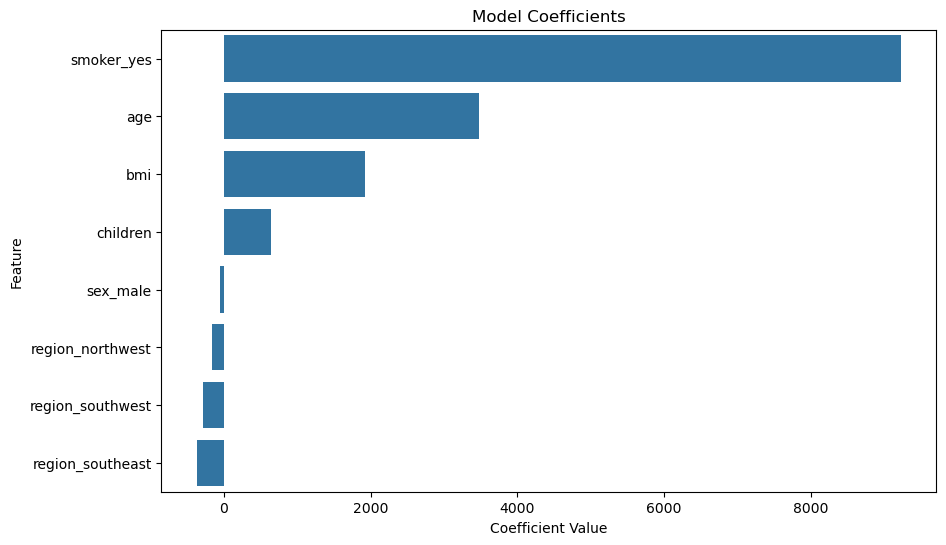

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted)
plt.title('Model Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [51]:
coefficients_abs = pd.DataFrame({'Feature': X_encoded.columns, 'Absolute_Coefficient': np.abs(model.coef_)})
coefficients_abs_sorted = coefficients_abs.sort_values(by='Absolute_Coefficient', ascending=False)
display(coefficients_abs_sorted)

,Feature,Absolute_Coefficient
4,smoker_yes,9234.342487
0,age,3472.975553
1,bmi,1927.828251
2,children,636.501185
6,region_southeast,371.780810
7,region_southwest,284.610396
5,region_northwest,168.944439
3,sex_male,50.749675


The coefficient for 'smoker_yes' is approximately 9234.34. This suggests that, holding all other features constant, being a smoker is associated with an increase of about $9234.34 in predicted insurance charges compared to being a non-smoker. This is the most significant factor influencing charges in this model.